In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)

# Consumer-Resource Model with or without Monod Equation
The ODEs defining the Consumer-Resource Model are
$$
\dot{N}(t) = [\gamma g(R(t)) - d] N(t)
$$
and
$$
\dot{R}(t) = \mu(R(t)) - g(R(t))N(t)
$$
Let us consider an abiotic resource, then
$$
\mu(R(t)) = C = \text{constant}
$$
while the expression of $g(\cdot)$ is the main subject of this small simulation.<br>
For the meaning of the various terms that appear in the equations, please refer to the brief report.

### 1. Linear Intake
In this first simple model, we assume
$$
g(R(t)) = q R(t)
$$

In [2]:
##################### PARAMETERS #####################
gamma   = 0.8                       # Yield coefficient
d       = 0.4                       # Consumer death rate
q       = 0.2                       # Uptake constant
C       = 5                         # Resource supply

T       = 100000                    # Total time
dt      = 0.0001                    # Timestep

N0      = 2                         # Initial consumers
R0      = 5                         # Initial resources

N = np.zeros(shape = T + 1)
R = np.zeros(shape = T + 1)

N[0], R[0] = N0, R0


##################### SIMULATION LOOP #####################
for t in range(T):
    dN = ( gamma * q * R[t] - d ) * N[t] * dt
    dR = ( C - q * R[t] * N[t] ) * dt

    N[t+1] = N[t] + dN
    R[t+1] = R[t] + dR

Theoretically, by using the quasi-stationary approximation, we expect stationary values equal to
$$
N^* = \frac{\gamma C}{d} = \frac{0.8 \times 5}{0.4} = 10
$$
and 
$$
R^* = \frac{C}{q N^*} = \frac{5}{0.2 \times 10} = 2.5
$$

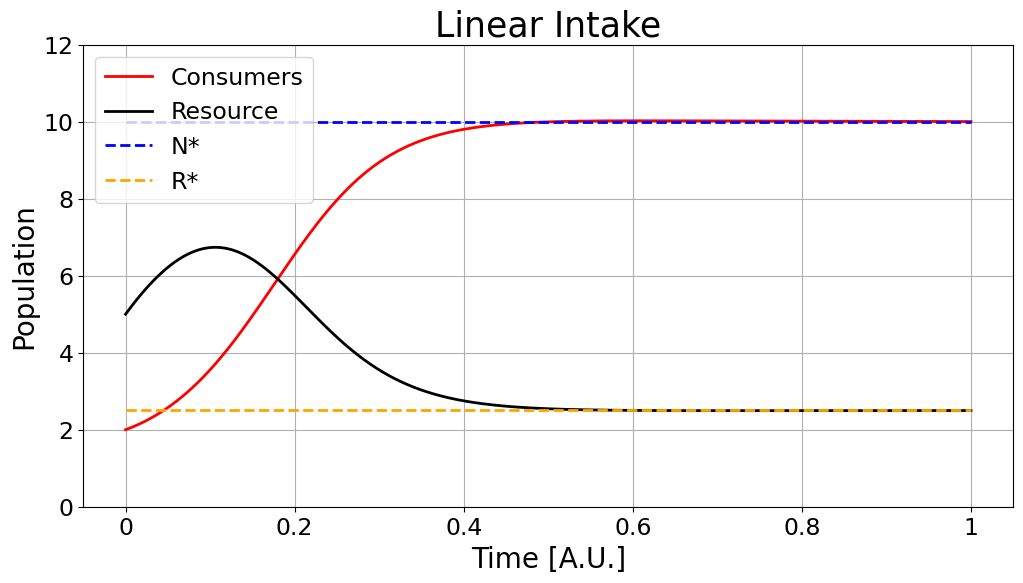

In [3]:
# Plot the evolution
plt.figure(figsize = (12, 6))
plt.plot(N, label = 'Consumers', color = 'red', linewidth = 2)
plt.plot(R, label = 'Resource', color = 'black', linewidth = 2)
plt.hlines(y = 10, xmin = 0, xmax = T, color = 'blue', linewidth = 2, linestyle = '--', label = 'N*')
plt.hlines(y = 2.5, xmin = 0, xmax = T, color = 'orange', linewidth = 2, linestyle = '--', label = 'R*')
plt.legend(loc = 'best', fontsize = 17)
plt.xlabel('Time [A.U.]', fontsize = 20)
plt.ylabel('Population', fontsize = 20)
plt.title('Linear Intake', fontsize = 25)
plt.xticks(ticks = [0, 20000, 40000, 60000, 80000, 100000], labels = [0, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylim(bottom = 0, top = 12)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.grid(True)

## Monod Equation
Now
$$
g(R) = \frac{q_M R(t)}{K + R(t)}
$$

In [14]:
##################### PARAMETERS #####################
q_M     = 3                        # Max uptake rate
K       = 8                         # Half-saturation constant

T       = 100000                    # Total time
dt      = 0.0001                    # Timestep

N0      = 2                         # Initial consumers
R0      = 5                         # Initial resources

N_monod = np.zeros(shape = T + 1)
R_monod = np.zeros(shape = T + 1)

N_monod[0], R_monod[0] = N0, R0


##################### SIMULATION LOOP #####################
for t in range(T):
    dN = ( gamma * ( q_M * R_monod[t] ) / ( K + R_monod[t] ) - d ) * N_monod[t] * dt
    dR = ( C - ( q_M * R_monod[t] ) / ( K + R_monod[t] ) * N_monod[t] ) * dt

    N_monod[t+1] = N_monod[t] + dN
    R_monod[t+1] = R_monod[t] + dR

The value of $N^*$ does not really change in this new approximation. However, the stationary value of the resource becomes
$$
R^* = \frac{CK}{q_M N^* - C} = \frac{5 \times 8}{3 \times 10 - 5} = 1.6
$$

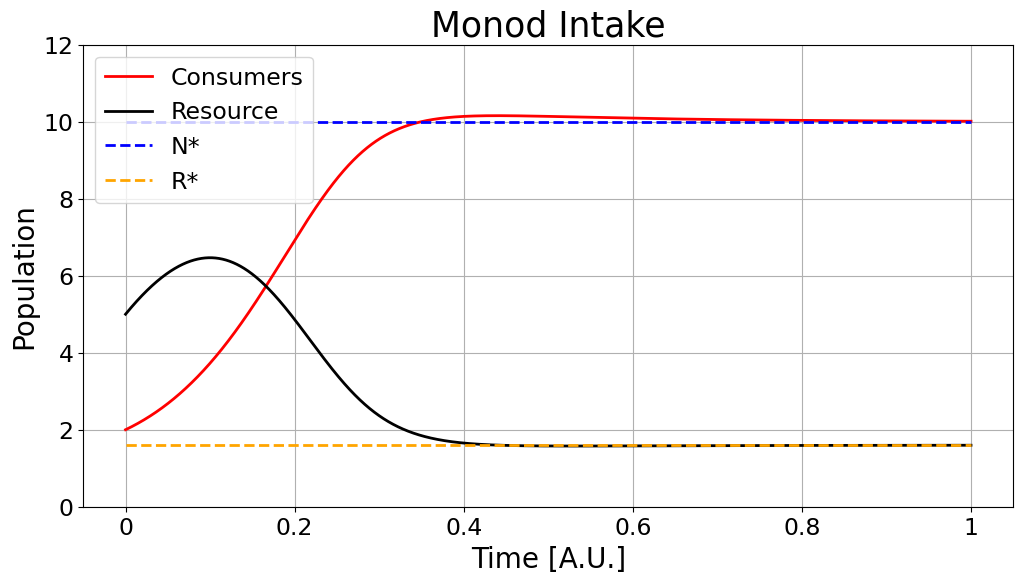

In [15]:
# Plot the evolution
plt.figure(figsize = (12, 6))
plt.plot(N_monod, label = 'Consumers', color = 'red', linewidth = 2)
plt.plot(R_monod, label = 'Resource', color = 'black', linewidth = 2)
plt.hlines(y = 10, xmin = 0, xmax = T, color = 'blue', linewidth = 2, linestyle = '--', label = 'N*')
plt.hlines(y = 1.6, xmin = 0, xmax = T, color = 'orange', linewidth = 2, linestyle = '--', label = 'R*')
plt.legend(loc = 'best', fontsize = 17)
plt.xlabel('Time [A.U.]', fontsize = 20)
plt.ylabel('Population', fontsize = 20)
plt.title('Monod Intake', fontsize = 25)
plt.xticks(ticks = [0, 20000, 40000, 60000, 80000, 100000], labels = [0, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylim(bottom = 0, top = 12)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.grid(True)

Finally, we can compare the evolution of the two systems (linear intake vs. Monod intake)

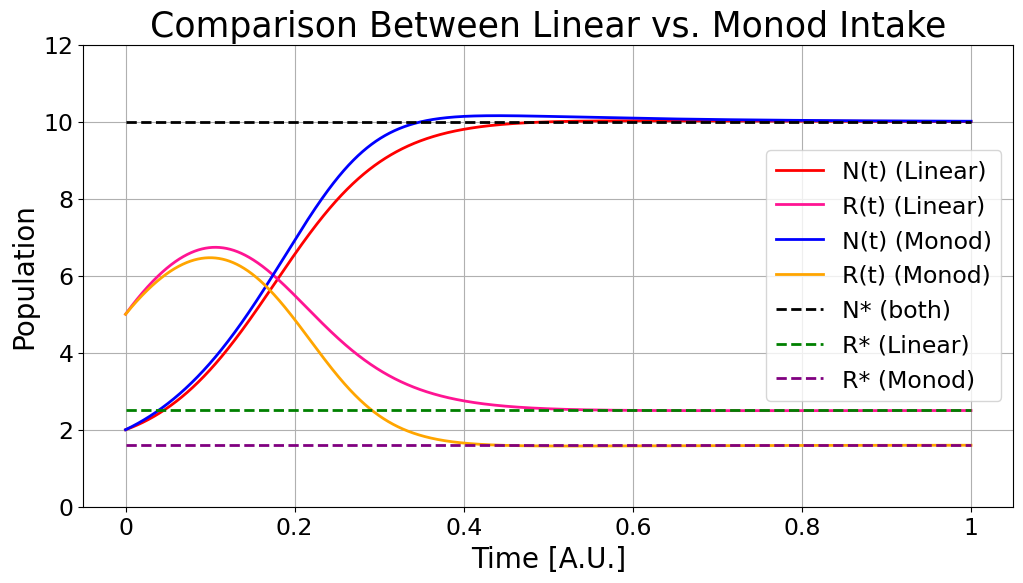

In [16]:
plt.figure(figsize = (12, 6))
plt.plot(N, label = 'N(t) (Linear)', color = 'red', linewidth = 2)
plt.plot(R, label = 'R(t) (Linear)', color = 'deeppink', linewidth = 2)
plt.plot(N_monod, label = 'N(t) (Monod)', color = 'blue', linewidth = 2)
plt.plot(R_monod, label = 'R(t) (Monod)', color = 'orange', linewidth = 2)

plt.hlines(y = 10, xmin = 0, xmax = T, label = 'N* (both)', color = 'black', linestyle = '--', linewidth = 2)
plt.hlines(y = 2.5, xmin = 0, xmax = T, label = 'R* (Linear)', color = 'green', linestyle = '--', linewidth = 2)
plt.hlines(y = 1.6, xmin = 0, xmax = T, label = 'R* (Monod)', color = 'purple', linestyle = '--', linewidth = 2)

plt.legend(loc = 'best', fontsize = 17)
plt.xlabel('Time [A.U.]', fontsize = 20)
plt.ylabel('Population', fontsize = 20)
plt.title('Comparison Between Linear vs. Monod Intake', fontsize = 25)
plt.xticks(ticks = [0, 20000, 40000, 60000, 80000, 100000], labels = [0, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylim(bottom = 0, top = 12)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.grid(True)

And we can plot the phase portrait of $R(t)$ vs. $N(t)$ for both models

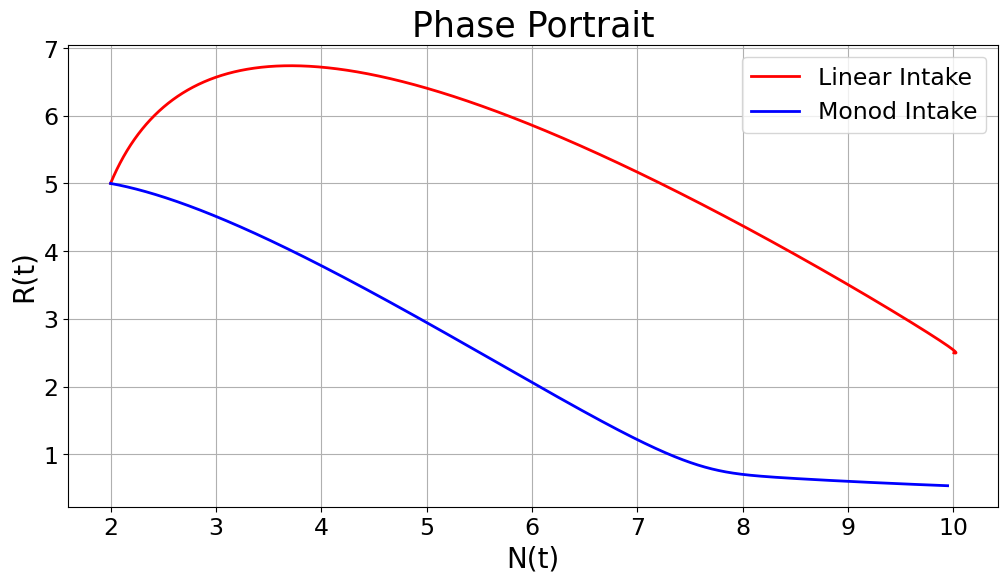

In [7]:
plt.figure(figsize = (12, 6))
plt.plot(N, R, label = 'Linear Intake', color = 'red', linewidth = 2)
plt.plot(N_monod, R_monod, label = 'Monod Intake', color = 'blue', linewidth = 2)
plt.legend(loc = 'best', fontsize = 17)
plt.xlabel('N(t)', fontsize = 20)
plt.ylabel('R(t)', fontsize = 20)
plt.title('Phase Portrait', fontsize = 25)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.grid(True)

Finally, let us explore a case: So far, we studied models where the initial population $N_0 < N^*$. What if, instead, $N_0 > N^*$? We develop this simulation only for the linear intake remembering that $N^* = 10$.

In [8]:
M0      = 15                        # Initial consumers, larger than N*
Q0      = 5                         # Initial resources, identical to the previous example

M = np.zeros(shape = T + 1)
Q = np.zeros(shape = T + 1)        

M[0], Q[0] = M0, Q0


##################### SIMULATION LOOP #####################
for t in range(T):
    dM = ( gamma * q * Q[t] - d ) * M[t] * dt
    dQ = ( C - q * Q[t] * M[t] ) * dt

    M[t+1] = M[t] + dM
    Q[t+1] = Q[t] + dQ

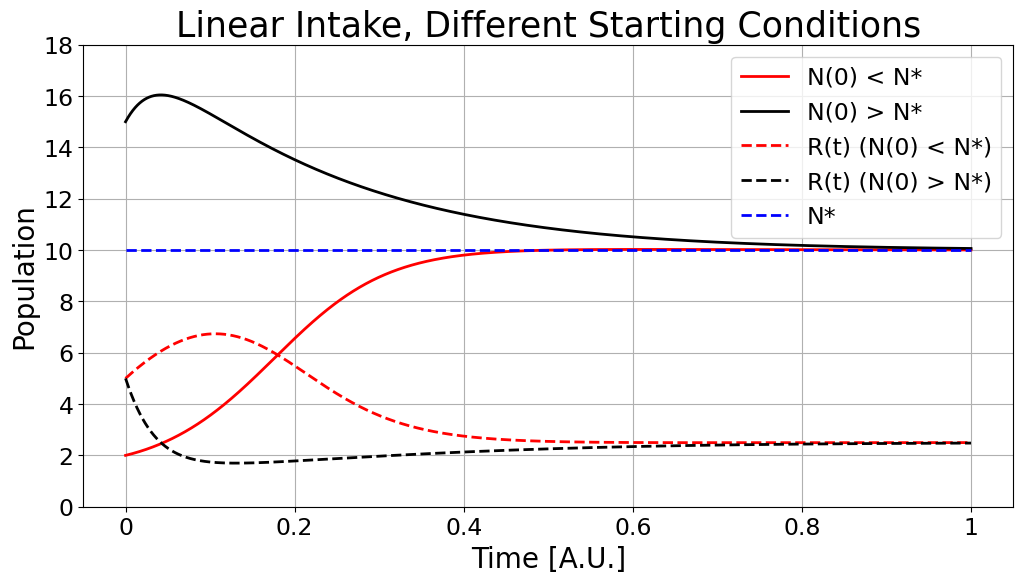

In [9]:
# Plot the evolution
plt.figure(figsize = (12, 6))
plt.plot(N, label = 'N(0) < N*', color = 'red', linewidth = 2)
plt.plot(M, label = 'N(0) > N*', color = 'black', linewidth = 2)
plt.plot(R, label = 'R(t) (N(0) < N*)', color = 'red', linewidth = 2, linestyle = '--')
plt.plot(Q, label = 'R(t) (N(0) > N*)', color = 'black', linewidth = 2, linestyle = '--')
plt.hlines(y = 10, xmin = 0, xmax = T, color = 'blue', linewidth = 2, linestyle = '--', label = 'N*')
plt.legend(loc = 'best', fontsize = 17)
plt.xlabel('Time [A.U.]', fontsize = 20)
plt.ylabel('Population', fontsize = 20)
plt.title('Linear Intake, Different Starting Conditions', fontsize = 25)
plt.xticks(ticks = [0, 20000, 40000, 60000, 80000, 100000], labels = [0, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylim(bottom = 0, top = 18)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.grid(True)